## Old Dataset(Staircase) 

In [2]:

# coding: utf-8
import pandas as pd
import numpy as np

data = pd.read_csv('jury_data.csv', encoding= 'ISO-8859-1', skiprows=[0,2])
data.rename(columns={"Was defendant Mesa Management negligent?": "Mesa_Negligent", 
                         "Was Mesa Management's negligence a substantial factor in causing harm to  Mackenzie Dunn?":"Liability",
                         "What are the total damages that you find that MacKenzie Dunn sufferered?":"damages" ,
                         "What is your sex?": "gender",
                         "Please write your answer to the preceding damages question in words (quality check).":"damages_word",
                         "What percentage of responsibility for Mackenzie Dunn's injuries was each party responsible for? (Answers should add up to 100%) - Mesa Management Co":"Mesa_reponsible_percentage",
                         "Path":"Scenario",
                         "Was MacKenzie Dunn negligent?":"Dunn_negligent",
                         "Unnamed: 63":"perc_calc"
                         },inplace=True)
data['mm_perc'] = np.where(data['Mesa_reponsible_percentage']>=1, data['perc_calc'], data['Mesa_reponsible_percentage'])
req_data = pd.DataFrame(data[["Mesa_Negligent","damages","Liability",
                 "gender",
                 "damages_word",
                 "Scenario","Dunn_negligent","perc_calc","Start Date","End Date","mm_perc"]])


req_data['Liability'] = req_data['Liability'].map({'Yes': 1, 'No': 0})


print(req_data.columns)



print(pd.isnull(req_data).any())
print(pd.isnull(req_data['Scenario']).any())
req_data = req_data[np.isfinite(data['Scenario'])]
print(pd.isnull(req_data['Scenario']).any())
req_data['damages'].fillna(0,inplace=True)
req_data['damages_word'].fillna(0,inplace=True)
req_data['mm_perc'].fillna(1,inplace=True)
req_data['perc_calc'].fillna(0,inplace=True)
#Dropping the last two rows which has null values
#data[pd.isnull(data['Path'])]
#data['Path']=data.Path.dropna(inplace= True)
#data[pd.isnull(data['Path'])]
print(pd.isnull(req_data).any())




#Changing data types of columns
req_data['End Date'] = pd.to_datetime(data['End Date'])
req_data['Start Date'] = pd.to_datetime(data['Start Date'])
req_data['Scenario']= req_data.Scenario.astype(int)
req_data['Liability']= req_data.Liability.astype(int)
req_data.dtypes

# Getting the id of the column
data.columns.get_loc("Liability")

Index(['Mesa_Negligent', 'damages', 'Liability', 'gender', 'damages_word',
       'Scenario', 'Dunn_negligent', 'perc_calc', 'Start Date', 'End Date',
       'mm_perc'],
      dtype='object')
Mesa_Negligent     True
damages            True
Liability          True
gender             True
damages_word       True
Scenario           True
Dunn_negligent     True
perc_calc          True
Start Date        False
End Date          False
mm_perc            True
dtype: bool
True
False
Mesa_Negligent    False
damages           False
Liability         False
gender            False
damages_word      False
Scenario          False
Dunn_negligent     True
perc_calc         False
Start Date        False
End Date          False
mm_perc           False
dtype: bool


55

In [3]:
#Cleaning Damages and perc_calc column
print(req_data.isnull().any())
req_data['damages'] = req_data['damages'].str.replace(',', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace('$', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace(',', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace('-', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace("  ", '')
req_data['mm_perc'] = req_data['mm_perc'].str.replace("$", '')
req_data['mm_perc'] = req_data['mm_perc'].str.replace(",", '')
req_data['mm_perc'] = req_data['mm_perc'].str.replace("  ", '')
#req_data.damages=pd.to_numeric(req_data['damages'].str.replace(',', ''))
#req_data.perc_calc=pd.to_numeric(req_data.perc_calc)

req_data.damages=pd.to_numeric(req_data['damages'])
req_data.perc_calc=pd.to_numeric(req_data.perc_calc)
req_data['damages'].fillna(0,inplace=True)  
req_data['mm_perc'].fillna(1,inplace=True)
req_data['perc_calc'].fillna(0,inplace=True)
#print(req_data.damages)
print(req_data.isnull().any())

print(req_data[pd.isnull(req_data['Dunn_negligent'])])


Mesa_Negligent    False
damages           False
Liability         False
gender            False
damages_word      False
Scenario          False
Dunn_negligent     True
perc_calc         False
Start Date        False
End Date          False
mm_perc           False
dtype: bool
Mesa_Negligent    False
damages           False
Liability         False
gender            False
damages_word      False
Scenario          False
Dunn_negligent     True
perc_calc         False
Start Date        False
End Date          False
mm_perc           False
dtype: bool
    Mesa_Negligent  damages  Liability  gender damages_word  Scenario  \
0               No      0.0          0  Female            0         1   
1               No      0.0          0    Male            0         1   
2               No      0.0          0    Male            0         1   
3               No      0.0          0    Male            0         1   
4               No      0.0          0    Male            0         1   
5         

In [4]:
#EDA

req_data['winrate_percentage']=req_data.Liability
req_data['damages_mean']=req_data.damages+req_data.perc_calc
req_data['damages_median']=req_data.damages
req_data['damages_sd']=req_data.damages

winrate_damages_expected=req_data.groupby('Scenario').aggregate(
    {'winrate_percentage': np.mean, 'damages_mean': np.mean,'damages_median':np.median,'damages_sd':np.std})


winrate_damages_expected

,winrate_percentage,damages_mean,damages_median,damages_sd
Scenario,,,,
1,0.472637,86726.368159,0.0,103468.323799
2,0.487310,89847.715736,0.0,102895.999731
3,0.688172,125663.978495,105000.0,109965.448888
4,0.602941,111214.852941,100000.0,106675.801852
5,0.575916,96426.701571,90000.0,100404.383527


In [5]:

#req_data['winrate_percentage']=np.mean(req_data.Juror_Response)
#print(req_data)
req_data['mm_perc'].fillna(1,inplace=True)
req_data['damages_mean1']=req_data.damages*pd.to_numeric(req_data.mm_perc)
req_data['damages_median1']=req_data.damages
req_data['damages_sd1']=req_data.damages
#print(req_data.mm_perc)

winrate_damages_plaintiffwin=req_data.loc[(req_data['Dunn_negligent']=='No') & (req_data['Liability']==1)].groupby('Scenario').aggregate({'damages_mean1': np.mean,'damages_median1':np.median,'damages_sd1':np.std})


winrate_damages_plaintiffwin

,damages_mean1,damages_median1,damages_sd1
Scenario,,,
1,185125.000000,180000.0,78852.429869
2,177743.902439,160000.0,72767.821367
3,186972.477064,180000.0,80274.466527
4,189429.906542,180000.0,73657.559546
5,173118.279570,150000.0,78781.184228


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.factorplot(x='Scenario', y='damages', kind='box',data=req_data)



Liability,0,1
Scenario,,
1,106,95
2,101,96
3,58,128
4,81,123
5,81,110


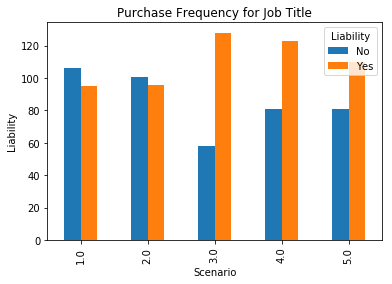

In [7]:
pd.crosstab(data.Scenario,data.Liability).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Scenario')
plt.ylabel('Liability')
plt.savefig('Juror Response per each Scenario')



a = req_data['Scenario']
b = req_data['Liability']
pd.crosstab(a,b)

## New Dataset(Snowboard) 

In [8]:
import pandas as pd
df =pd.read_csv('Low_Anchor.tsv', sep='\t+',skiprows=[0,2, 4]+list(range(1,1614,2)) + [1614], names = ['StartDate', 'EndDate',
       'ResponseType', 
       'IP Address', 
       'Progress', 
       'Duration',
       'Finished',
       'RecordedDate',
       'ResponseID', 
       'RecipientLastName','RecipientFirstName','RecipientEmail',
       'ExternalDataReference','LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Participation_in_this_project.',
       'Browser Meta Info - Browser',
       'Browser Meta Info - Version',
       'Browser Meta Info - Operating System',
       'Browser Meta Info - Resolution',
       'What number did you hear?',
       'What word did you see?',
       'What is your sex?',
       'How old are you?',
       'Which of the following best describes your ethnicity?',
       'Are you Spanish/Hispanic/Latino',
       'What is the highest degree or level of school you have completed?',
       'This is an attention check.  Select 200.',
       'Which of the following best describes your total household income?',
       'Where would you place yourself on this scale?',
       'What is your zip code?',
       'Timing - First Click','Timing - Last Click','Timing - Page Submit', 'Timing - Click Count',
       'Timing - First Click.1', 'Timing - Last Click.1', 'Timing - Page Submit.1',
       'Timing - Click Count.1', 'Timing - First Click.2','Timing - Last Click.2',
       'Timing - Page Submit.2','Timing - Click Count.2','Timing - First Click.3','Timing - Last Click.3',
       'Timing - Page Submit.3','Timing - Click Count.3','Timing - First Click.4', 'Timing - Last Click.4',
       'Timing - Page Submit.4','Timing - Click Count.4', 'Timing - First Click.5', 'Timing - Last Click.5',
       'Timing - Page Submit.5','Timing - Click Count.5', 'Timing - First Click.6', 'Timing - Last Click.6',
       'Timing - Page Submit.6',  'Timing - Click Count.6', 'Timing - First Click.7','Timing - Last Click.7',
       'Timing - Page Submit.7',  'Timing - Click Count.7',
       'Identify the statement that correctly describes the facts of this case. (This is the attention check)',
       'Was_snowboard_sold_McNeil_defective_14', ## using this
       "Is_substantial_factor_McNeil_injuries_14",
       'Non_economic_damages_McNeil_suffered_14',
       'Damages_words_14',
       'Was_McNeil_negligent',
       'McNeil_negligence_substantial_factor_for_injuries',
       'Percentage_of_responsibility_X5',
       'Percentage_of_responsibility_McNeil',
       'Was_snowboard_sold_McNeil_defective_58',
       "Is_substantial_factor_McNeil_injuries_58",
       'Economic_damages_McNeil_suffer_58',
       'Economic_Damages_In_Word_58',
       'Non_economic_damages_McNeil_suffered_58',
       'Non_Economic_Damages_In_Word_58',
       'Please explain why you arrived at your decision? (50 character minimum)',
       'Q40',#'Did the fact that X5 added core inserts to the later Carve 3000 model, affect your view as to whether the original Carve 3000 was defective?',
       'Q41', #'Were you able to ignore the  fact that X5 added core inserts to the later Carve 3000 model when deciding whether the original Carve 3000 was defective?',
       'Path'])
        
df.head()

C:\Users\Pruthwiraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,StartDate,EndDate,ResponseType,IP Address,Progress,Duration,Finished,RecordedDate,ResponseID,RecipientLastName,...,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Economic_Damages_In_Word_58,Non_economic_damages_McNeil_suffered_58,Non_Economic_Damages_In_Word_58,Please explain why you arrived at your decision? (50 character minimum),Q40,Q41,Path
0, 4 / 6 / 1 8   1 3 : 1 4 , 4 / 6 / 1 8   1 3 : 1 5 , 0 , 7 6 . 8 4 . 2 5 0 . 1 4 3 , 1 0 0 , 3 4 , 1 , 4 / 6 / 1 8   1 3 : 1 5 , R _ 2 V e D w 6 k P p O 7 N X v z , ,..., , , , , , , , , , 
1, 4 / 6 / 1 8   1 3 : 1 5 , 4 / 6 / 1 8   1 3 : 1 6 , 0 , 1 0 7 . 1 4 0 . 1 9 1 . 1 7 6 , 1 0 0 , 4 2 , 1 , 4 / 6 / 1 8   1 3 : 1 6 , R _ 1 e J q 1 K w X T Y y a e w m , ,..., , , , , , , , , , 
2, 4 / 6 / 1 8   1 3 : 1 7 , 4 / 6 / 1 8   1 3 : 1 8 , 0 , 1 3 8 . 2 0 7 . 1 6 8 . 1 4 8 , 1 0 0 , 6 0 , 1 , 4 / 6 / 1 8   1 3 : 1 8 , R _ 2 q l Q Q Y 4 F U r K Y e y z , ,..., , , , , , , , , , 6 
3, 4 / 6 / 1 8   1 3 : 1 7 , 4 / 6 / 1 8   1 3 : 1 8 , 0 , 7 2 . 1 9 8 . 7 4 . 1 3 5 , 1 0 0 , 6 9 , 1 , 4 / 6 / 1 8   1 3 : 1 8 , R _ 1 l m Z b A x g O 0 A P U 5 T , ,..., , , , , , , , , , 
4, 4 / 6 / 1 8   1 3 : 1 4 , 4 / 6 / 1 8   1 3 : 1 9 , 0 , 1 0 7 . 7 7 . 2 0 9 . 4 2 , 1 0 0 , 2 5 5 , 1 , 4 / 6 / 1 8   1 3 : 1 9 , R _ 1 n O b S X p L 5 d 0 w f Q S , ,..., , , , , , , , , , 7 


In [9]:
df.dtypes

StartDate                                                                                                object
EndDate                                                                                                  object
ResponseType                                                                                             object
IP Address                                                                                               object
Progress                                                                                                 object
Duration                                                                                                 object
Finished                                                                                                 object
RecordedDate                                                                                             object
ResponseID                                                                                              

## Replacing hexadecimal value of damages'/x00' to ''(empty string)

In [10]:

for i in range(len(df)):
    df['Was_snowboard_sold_McNeil_defective_14'].values[i] = df['Was_snowboard_sold_McNeil_defective_14'].values[i].replace('\x00','')
    df['Is_substantial_factor_McNeil_injuries_14'].values[i] = df['Is_substantial_factor_McNeil_injuries_14'].values[i].replace('\x00','')
    df['Non_economic_damages_McNeil_suffered_14'].values[i] = df['Non_economic_damages_McNeil_suffered_14'].values[i].replace('\x00','')
    df['Damages_words_14'].values[i] = df['Damages_words_14'].values[i].replace('\x00','')
    df['Was_McNeil_negligent'].values[i] = df['Was_McNeil_negligent'].values[i].replace('\x00','') ;
    df['McNeil_negligence_substantial_factor_for_injuries'].values[i] = df['McNeil_negligence_substantial_factor_for_injuries'].values[i].replace('\x00','') ;
    df['Percentage_of_responsibility_X5'].values[i] = df['Percentage_of_responsibility_X5'].values[i].replace('\x00','') ;
    df['Percentage_of_responsibility_McNeil'].values[i] = df['Percentage_of_responsibility_McNeil'].values[i].replace('\x00','') ;
    df['Was_snowboard_sold_McNeil_defective_58'].values[i] = df['Was_snowboard_sold_McNeil_defective_58'].values[i].replace('\x00','') ;
    df['Is_substantial_factor_McNeil_injuries_58'].values[i] = df['Is_substantial_factor_McNeil_injuries_58'].values[i].replace('\x00','') ;
    df['Economic_damages_McNeil_suffer_58'].values[i] = df['Economic_damages_McNeil_suffer_58'].values[i].replace('\x00','') ;
    df['Economic_Damages_In_Word_58'].values[i] = df['Economic_Damages_In_Word_58'].values[i].replace('\x00','') ;
    df['Non_economic_damages_McNeil_suffered_58'].values[i] = df['Non_economic_damages_McNeil_suffered_58'].values[i].replace('\x00','') ;
    df['Non_Economic_Damages_In_Word_58'].values[i] = df['Non_Economic_Damages_In_Word_58'].values[i].replace('\x00','') ;
    df['Path'].values[i] = df['Path'].values[i].replace('\x00','') ;  
    df['Q40'].values[i] = df['Q40'].values[i].replace('\x00','') ; 
    df['Q41'].values[i] = df['Q41'].values[i].replace('\x00','') ; 
    df['Duration'].values[i] = df['Duration'].values[i].replace('\x00','') ;
    #df['Was the Carve 3000 snowboard X5 sold Connor McNeil defective?'].values[i] =  df['Was the Carve 3000 snowboard X5 sold Connor McNeil defective?'].values[i].replace('\x00','') ;  

### After dealing with Special Character in data, lets change the Data type of required columns 

In [11]:

df.StartDate = pd.to_datetime(df.StartDate)
df.EndDate   = pd.to_datetime(df.EndDate) 
#df.Was_snowboard_sold_McNeil_defective_14   = pd.to_numeric(df.Was_snowboard_sold_McNeil_defective_14)
df.Is_substantial_factor_McNeil_injuries_14 = pd.to_numeric(df.Is_substantial_factor_McNeil_injuries_14)
df.Non_economic_damages_McNeil_suffered_14  = pd.to_numeric(df.Non_economic_damages_McNeil_suffered_14)
df.Was_McNeil_negligent                     = pd.to_numeric(df.Was_McNeil_negligent)
df.McNeil_negligence_substantial_factor_for_injuries= pd.to_numeric(df.McNeil_negligence_substantial_factor_for_injuries)
df.Percentage_of_responsibility_X5          = pd.to_numeric(df.Percentage_of_responsibility_X5)
df.Percentage_of_responsibility_McNeil      = pd.to_numeric(df.Percentage_of_responsibility_McNeil)
#df.Was_snowboard_sold_McNeil_defective_58   = pd.to_numeric(df.Was_snowboard_sold_McNeil_defective_58)
df.Is_substantial_factor_McNeil_injuries_58 = pd.to_numeric(df.Is_substantial_factor_McNeil_injuries_58)
df.Economic_damages_McNeil_suffer_58        = pd.to_numeric(df.Economic_damages_McNeil_suffer_58)
df.Non_economic_damages_McNeil_suffered_58  = pd.to_numeric(df.Non_economic_damages_McNeil_suffered_58)
df.Q40 =pd.to_numeric(df.Q40) 
#df.Q41 =pd.to_numeric(df.Q41) 
# Handling for Path
df.Path = pd.to_numeric(df.Path) 
df['Path'].fillna(0,inplace = True)
df.Duration   = pd.to_numeric(df.Duration)
df.Duration =  df.Duration.astype(int)
df.Path =  df.Path.astype(int)
df.dtypes

StartDate                                                                                                datetime64[ns]
EndDate                                                                                                  datetime64[ns]
ResponseType                                                                                                     object
IP Address                                                                                                       object
Progress                                                                                                         object
Duration                                                                                                          int32
Finished                                                                                                         object
RecordedDate                                                                                                     object
ResponseID                              

*** Note  Failed parsing df.Q41 =pd.to_numeric(df.Q41) 
<font color = red> Need to check the data. It has one invalid row '1,3'</font>

In [12]:
df.Q41.unique()

array(['', '3', '1', '"1,3"'], dtype=object)

## Extracting the required columns and storing it in "newdf" data frame.

In [13]:
newdf =pd.DataFrame(df[['StartDate', 'EndDate','Duration',
       'Was_snowboard_sold_McNeil_defective_14', 
       "Is_substantial_factor_McNeil_injuries_14",
       'Non_economic_damages_McNeil_suffered_14',                                                                                         
       'Was_McNeil_negligent',
       'McNeil_negligence_substantial_factor_for_injuries',                                                                                         
       'Percentage_of_responsibility_X5',
       'Percentage_of_responsibility_McNeil'                                                                                      ,
       'Was_snowboard_sold_McNeil_defective_58',
       "Is_substantial_factor_McNeil_injuries_58",
       'Economic_damages_McNeil_suffer_58',
       'Non_economic_damages_McNeil_suffered_58',
       'Q40',
       'Q41',
       'Path']])
        
newdf.sample(5)

,StartDate,EndDate,Duration,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Q41,Path
650,2018-04-06 13:43:00,2018-04-06 14:05:00,1352,,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,3.0,,7
344,2018-04-06 13:42:00,2018-04-06 13:45:00,161,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,4
206,2018-04-06 13:17:00,2018-04-06 13:41:00,1432,6,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,3.0,,1
699,2018-04-06 13:54:00,2018-04-06 14:22:00,1648,,NaN,NaN,2.0,2.0,NaN,NaN,4,5.0,10000.0,490000.0,2.0,3,7
632,2018-04-06 13:20:00,2018-04-06 14:02:00,2488,4,6.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,3.0,1,2


## Handling Percentage Calculation    

We have two columns that save the percentage of responsibility for X5 and McNeil. The total sum should be 100. 
If it is less than 100 or greater than 100, then we need to change to relative percentage , so that it should be round to 100.

Lets see what are the data in these columns and if there is any null/NaN values , then we have to deal with that.

In [14]:
print("Unique values for _X5 ", newdf.Percentage_of_responsibility_X5.unique())
print("Unique values for _McNiel ", newdf.Percentage_of_responsibility_McNeil.unique())

Unique values for _X5  [ nan  50.  65.  75.  90.  80.  70.  25.  60.  40.  20.  15.   5.  10.
  35.  85.  55. 100.  45.  30.]
Unique values for _McNiel  [nan 50. 35. 25. 10. 20. 30. 75. 40. 60. 80. 85. 95. 90. 65. 15. 45.  0.
 55. 70.]


In Both the columns, we have NaN values. Before replacing NaN with 0s, lets first check which rows have 0 values.

In [15]:
newdf.query("Percentage_of_responsibility_McNeil == 0")

,StartDate,EndDate,Duration,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Q41,Path
510,2018-04-06 13:51:00,2018-04-06 13:53:00,136,,NaN,NaN,1.0,1.0,100.0,0.0,4,5.0,10000.0,490000.0,1.0,1,5


As there is one row with 0 value, we are replacing NaN with some nagative values say <font color = red >'-1'.</font> 

In [16]:
newdf['Percentage_of_responsibility_X5'].fillna(-1 ,inplace=True)
newdf['Percentage_of_responsibility_McNeil'].fillna(-1,inplace=True)
newdf.Percentage_of_responsibility_McNeil.unique()

array([-1., 50., 35., 25., 10., 20., 30., 75., 40., 60., 80., 85., 95.,
       90., 65., 15., 45.,  0., 55., 70.])

Lets see the distribution of total percentage.

In [17]:
newdf['Total_perc'] = newdf['Percentage_of_responsibility_X5']+newdf['Percentage_of_responsibility_McNeil']
newdf.query('Total_perc < 100 & Total_perc > 0 |Total_perc > 100 ')

,StartDate,EndDate,Duration,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Q41,Path,Total_perc


So for all cases each percentage are summing to 100 and there is no "Total Percentage" greater than or less than 100.

## See how many missing data points we have

#### Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [18]:
import numpy as np

missing_values_count = newdf.isnull().sum()

print(missing_values_count)

total_cells = np.product(newdf.shape)
total_missing = missing_values_count.sum()

print('Percent of data that is missing: ' , (total_missing/total_cells) * 100)


StartDate                                              0
EndDate                                                0
Duration                                               0
Was_snowboard_sold_McNeil_defective_14                 0
Is_substantial_factor_McNeil_injuries_14             618
Non_economic_damages_McNeil_suffered_14              637
Was_McNeil_negligent                                 489
McNeil_negligence_substantial_factor_for_injuries    489
Percentage_of_responsibility_X5                        0
Percentage_of_responsibility_McNeil                    0
Was_snowboard_sold_McNeil_defective_58                 0
Is_substantial_factor_McNeil_injuries_58             629
Economic_damages_McNeil_suffer_58                    656
Non_economic_damages_McNeil_suffered_58              656
Q40                                                   33
Q41                                                    0
Path                                                   0
Total_perc                     

In [19]:
newdf.shape

(804, 18)

### As we are just working on from path 1 to 8, Lets remove path with value 0.
So the number of rows to be removed having Path as 0 can be checked usig the ".shape"

In [20]:
newdf[newdf.Path <=0].shape

(13, 18)

So we have 13 rows . Let's have a look on those rows.

In [21]:
newdf[newdf.Path <=0]

,StartDate,EndDate,Duration,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Q41,Path,Total_perc
0,2018-04-06 13:14:00,2018-04-06 13:15:00,34,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0
1,2018-04-06 13:15:00,2018-04-06 13:16:00,42,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0
3,2018-04-06 13:17:00,2018-04-06 13:18:00,69,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0
5,2018-04-06 13:19:00,2018-04-06 13:19:00,14,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0
6,2018-04-06 13:17:00,2018-04-06 13:20:00,197,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0
7,2018-04-06 13:16:00,2018-04-06 13:20:00,215,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0
10,2018-04-06 13:23:00,2018-04-06 13:24:00,15,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0
16,2018-04-06 13:26:00,2018-04-06 13:27:00,87,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0
20,2018-04-06 13:19:00,2018-04-06 13:29:00,583,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0
21,2018-04-06 13:29:00,2018-04-06 13:30:00,41,,NaN,NaN,NaN,NaN,-1.0,-1.0,,NaN,NaN,NaN,NaN,,0,-2.0


<font color = 'red' size = "5"> As we can see there are 13 observation with path value equal to 0. We are removing these observation </font>

In [22]:
newdf = newdf[newdf.Path > 0]

## Filter the data based on the duration of each scenario
As per the requirement we have to filter the experiment one data based on the length of each scenario.
The lengths are as follows:
- Scenario 1   14:47 (887 seconds)
- Scenario 2   15:11 (911 seconds)
- Scenario 3   15:50 (950 seconds)
- Scenario 4   16:23 (983 seconds)
- Scenario 5   16:37 (997 seconds)

Let’s filter anyone who spent less than 10 second less than the whole time.  e.g 14:37(877), 15:01(901) etc.

In [23]:

Filter_data=newdf[((newdf.Path == 1) & (df.Duration>877))|((newdf.Path == 2) & (df.Duration>901))|((newdf.Path == 4) & (df.Duration>973))|((newdf.Path == 3) & (df.Duration>940)) | ((newdf.Path == 5) & (df.Duration>987))]

C:\Users\Pruthwiraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Replacing the Null Values with empty string(Easy to convert to other datatypes Later)

In [24]:

print(pd.isnull(newdf).any())
newdf = newdf[np.isfinite(newdf['Path'])]
newdf['Is_substantial_factor_McNeil_injuries_14'].fillna("",inplace=True)
newdf['Non_economic_damages_McNeil_suffered_14'].fillna("",inplace=True)
newdf['Was_McNeil_negligent'].fillna("",inplace=True)
newdf['McNeil_negligence_substantial_factor_for_injuries'].fillna("",inplace=True)
newdf['Percentage_of_responsibility_X5'].fillna("",inplace=True)
newdf['Percentage_of_responsibility_McNeil'].fillna("",inplace=True)
newdf['Was_snowboard_sold_McNeil_defective_58'].fillna("",inplace=True)
newdf['Is_substantial_factor_McNeil_injuries_58'].fillna("",inplace=True)
newdf['Economic_damages_McNeil_suffer_58'].fillna("",inplace=True)
newdf['Non_economic_damages_McNeil_suffered_58'].fillna("",inplace=True)
newdf['Q40'].fillna("",inplace=True)
newdf['Q41'].fillna("",inplace=True)
# Printing the first 5 lines.
newdf.head(5)

StartDate                                            False
EndDate                                              False
Duration                                             False
Was_snowboard_sold_McNeil_defective_14               False
Is_substantial_factor_McNeil_injuries_14              True
Non_economic_damages_McNeil_suffered_14               True
Was_McNeil_negligent                                  True
McNeil_negligence_substantial_factor_for_injuries     True
Percentage_of_responsibility_X5                      False
Percentage_of_responsibility_McNeil                  False
Was_snowboard_sold_McNeil_defective_58               False
Is_substantial_factor_McNeil_injuries_58              True
Economic_damages_McNeil_suffer_58                     True
Non_economic_damages_McNeil_suffered_58               True
Q40                                                   True
Q41                                                  False
Path                                                 Fal

,StartDate,EndDate,Duration,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Q41,Path,Total_perc
2,2018-04-06 13:17:00,2018-04-06 13:18:00,60,,,,,,-1.0,-1.0,,,,,,,6,-2.0
4,2018-04-06 13:14:00,2018-04-06 13:19:00,255,,,,,,-1.0,-1.0,,,,,,,7,-2.0
8,2018-04-06 13:17:00,2018-04-06 13:21:00,259,4,5,200000,1,1,50.0,50.0,,,,,2,3,3,100.0
9,2018-04-06 13:18:00,2018-04-06 13:21:00,192,4,5,35000,1,1,65.0,35.0,,,,,1,1,2,100.0
11,2018-04-06 13:19:00,2018-04-06 13:25:00,342,,,,,,-1.0,-1.0,6,,,,3,1,6,-2.0


### Changing datatype of damages and filling NULL values with 0s.

As per the requirement we have to calculate the Total Damages for each path.
There are 8 different Paths. 

- Path 1 2 3 4 : Scenarios with no Low Anchor. 
- Path 5 6 7 8 : Scenarios with Low Anchor. 

As we are not taking consideration of Low Anchor,we renamed Path 5,6,7,8 as 1,2,3,4 respectively. 

Later we converted the data type of Path as "Int".

In [25]:
newdf['Path'].replace([5, 6 ,7,8], [1,2,3,4], inplace = True)
newdf['Path']= newdf.Path.astype(int)

<font color='red'>We need to change the data type of damages. There are 3 different columns that have the damages 
information. From previous data type check, we found that there are so many missing values for damages.
So we replaced them with 0.
</font>

For simplicity to plot Path vs damages we combined all damages into one column and named it 
as "Total_Damages". 

In [26]:
newdf.Economic_damages_McNeil_suffer_58        = pd.to_numeric(newdf.Economic_damages_McNeil_suffer_58)
newdf.Non_economic_damages_McNeil_suffered_58  = pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_58)
newdf.Non_economic_damages_McNeil_suffered_14  = pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14) 


## Plot of Path vs Economic Damages.

#### We have economic damages only from Path 5 to 8, so ploting the graph for the same.

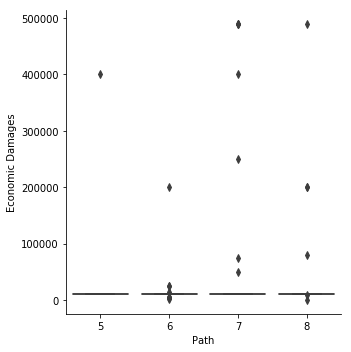

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
newdf58 = df[df.Path>4]
plt = sns.factorplot(x='Path', y='Economic_damages_McNeil_suffer_58', kind='box',data=newdf58, size=5)
_ = plt.set(xlabel='Path', ylabel='Economic Damages')

## Plot of Path(5 to 8) vs Non Economic Damages.

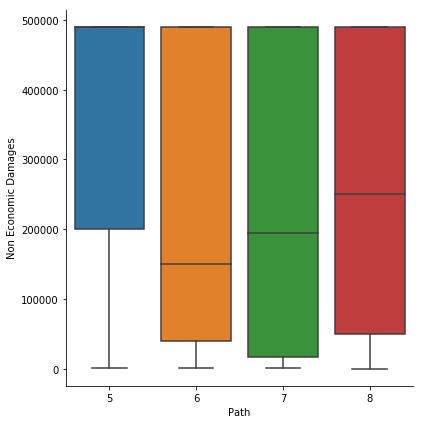

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt1 = sns.factorplot(x='Path', y='Non_economic_damages_McNeil_suffered_58', kind='box',data=newdf58, size=6)
_ = plt1.set(xlabel='Path', ylabel='Non Economic Damages')

## Plot of Path(1 to 4) vs Non Economic Damages.

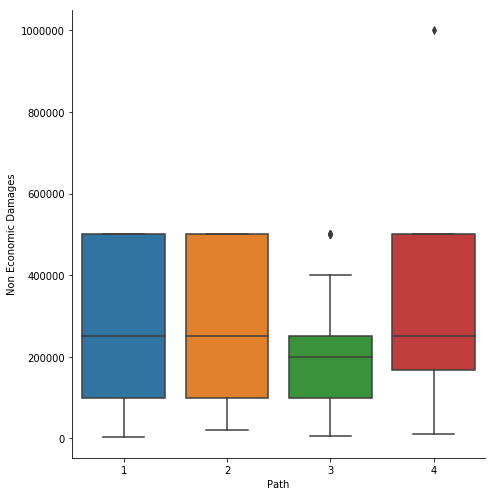

In [29]:
plt2 = sns.factorplot(x='Path', y='Non_economic_damages_McNeil_suffered_14', kind='box',data=newdf, size=7)
_ = plt2.set(xlabel='Path', ylabel='Non Economic Damages')

In [30]:
#create new column for non economic damages(for path 1 to 4 and path 5 to 8--do boxplot)

# Box Plot for Total Damages vs Path.

For the box plot, we need to replace the empty string with 0. But before Filling the NaN values with 0 , lets first check if any juror has put 0 intentionally.

In [31]:
newdf.query('Non_economic_damages_McNeil_suffered_14 == 0 | Non_economic_damages_McNeil_suffered_58 == 0 |Economic_damages_McNeil_suffer_58 ==0')

,StartDate,EndDate,Duration,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Q41,Path,Total_perc
246,2018-04-06 13:19:00,2018-04-06 13:42:00,1404,,,NaN,2,2,-1.0,-1.0,4,5,490000.0,0.0,1,3,4,-2.0


<font color='red'> We found that one row has 0 value for Non_economic damages McNeil suffered. 
</font>

In [32]:
newdf.Economic_damages_McNeil_suffer_58.fillna(0, inplace = True)
newdf.Non_economic_damages_McNeil_suffered_58.fillna(0, inplace = True)
newdf.Non_economic_damages_McNeil_suffered_14.fillna(0, inplace = True)

newdf['Total_Damages'] =  newdf['Economic_damages_McNeil_suffer_58']+newdf['Non_economic_damages_McNeil_suffered_58'] + newdf['Non_economic_damages_McNeil_suffered_14']

Lets see how many rows have Total Damage as 0. 

In [33]:
(newdf.Total_Damages==0).sum()

476

### We used Violin Plot because it allows a deeper understanding of the density of distribution. 

1)  Plot including Total Damages as **0** 

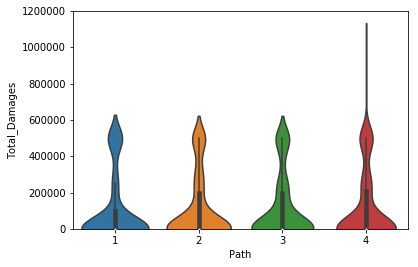

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.axes as p


newdf["Path"] = newdf.Path.astype('category')
#_=sns.factorplot(x='Path', y='Total_Damages', kind='violin',data=newdf, size=5)#.set(ylim=0)
#sns.factorplot(x='Path', y='Total_Damages',kind='violin',data=newdf, size=5)#.fit_kde

_ = sns.violinplot(x="Path", y="Total_Damages", data=newdf, inner = 'box').set(ylim=0)

# Note: This happens because to calculate the lowest whisker you use : 
#The values for Q1 – 1.5×IQR are the "fences" that mark off the "reasonable" 
# values from the outlier values.  gaussian_kde works for both uni-variate and multi-variate data. 
# It includes automatic bandwidth determination.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
   

2) Box plot excluding 0s

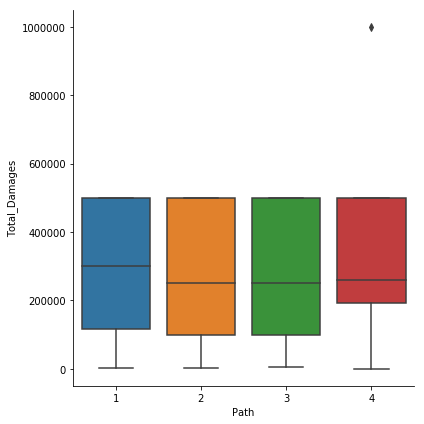

In [35]:
damage_df = newdf[newdf.Total_Damages >0]
sns.factorplot(x='Path', y='Total_Damages', kind='box',data=damage_df, size=6)

**Based on above boat xplot , we can see that there is an outlier value around 1000000 at path 4. Hence we will remove this value**

Or change to 500000(As per requirement) <font color= red> To--do </font>

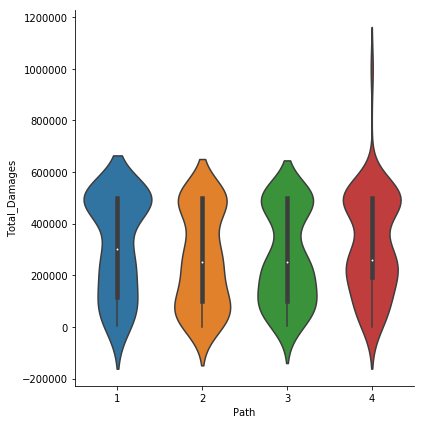

In [36]:
sns.factorplot(x='Path', y='Total_Damages', kind='violin',data=damage_df, size=6)

In [37]:
q = newdf["Total_Damages"].quantile(0.99)
print(q)
newdf.query("Total_Damages >= 500000")

500000.0


,StartDate,EndDate,Duration,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Q40,Q41,Path,Total_perc,Total_Damages
27,2018-04-06 13:15:00,2018-04-06 13:33:00,1051,4,5,500000.0,2,2,-1.0,-1.0,,,0.0,0.0,1,1,1,-2.0,500000.0
56,2018-04-06 13:14:00,2018-04-06 13:36:00,1287,4,5,500000.0,2,2,-1.0,-1.0,,,0.0,0.0,1,3,4,-2.0,500000.0
60,2018-04-06 13:15:00,2018-04-06 13:36:00,1244,,,0.0,1,1,50.0,50.0,4,5,10000.0,490000.0,1,3,1,100.0,500000.0
83,2018-04-06 13:29:00,2018-04-06 13:37:00,480,4,5,500000.0,2,2,-1.0,-1.0,,,0.0,0.0,3,,3,-2.0,500000.0
84,2018-04-06 13:14:00,2018-04-06 13:37:00,1396,4,5,500000.0,2,2,-1.0,-1.0,,,0.0,0.0,3,1,4,-2.0,500000.0
87,2018-04-06 13:16:00,2018-04-06 13:37:00,1290,,,0.0,2,2,-1.0,-1.0,4,5,10000.0,490000.0,2,1,4,-2.0,500000.0
114,2018-04-06 13:16:00,2018-04-06 13:38:00,1363,,,0.0,2,2,-1.0,-1.0,4,5,10000.0,490000.0,2,,3,-2.0,500000.0
116,2018-04-06 13:16:00,2018-04-06 13:38:00,1370,,,0.0,2,2,-1.0,-1.0,4,5,10000.0,490000.0,1,3,4,-2.0,500000.0
123,2018-04-06 13:16:00,2018-04-06 13:38:00,1371,,,0.0,2,2,-1.0,-1.0,4,5,10000.0,490000.0,3,1,4,-2.0,500000.0
124,2018-04-06 13:18:00,2018-04-06 13:39:00,1242,,,0.0,2,2,-1.0,-1.0,4,5,10000.0,490000.0,1,3,2,-2.0,500000.0


So Lets remove the outlier and plot the box plot again.

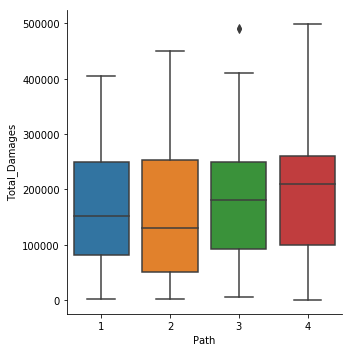

In [38]:
newdf1 = newdf[(newdf.Total_Damages < q) & (newdf.Total_Damages >0) ]
sns.factorplot(x='Path', y='Total_Damages', kind='box',data=newdf1, size=5)

## Graph showing the responses of jurors for each path

There are two separate columns in our dataset having the juror response. 
- Was_snowboard_sold_McNeil_defective_14 : keeping response from path 1 to 4
- Was_snowboard_sold_McNeil_defective_58 : keeping response from path 5 to 8

For plotting a single graph for all the path, we merge these two columns into a new column called **"Liability"**.


In [39]:
newdf['Liability'] = newdf['Was_snowboard_sold_McNeil_defective_14'] + newdf['Was_snowboard_sold_McNeil_defective_58']

Liability columns have numeric values. We have replaced it with 4 for <font color = green>'Yes'</font>  and 6 for <font color = red>'No'</font>. Liability with blank is replace with "No Reponse.

In [40]:
newdf['Liability'].replace(['4', '6' , ''], ['Yes','No', 'No Reponse'], inplace = True)

In [41]:
## Cleaning data(checking if any column has null values)
newdf.isnull().any()

StartDate                                            False
EndDate                                              False
Duration                                             False
Was_snowboard_sold_McNeil_defective_14               False
Is_substantial_factor_McNeil_injuries_14             False
Non_economic_damages_McNeil_suffered_14              False
Was_McNeil_negligent                                 False
McNeil_negligence_substantial_factor_for_injuries    False
Percentage_of_responsibility_X5                      False
Percentage_of_responsibility_McNeil                  False
Was_snowboard_sold_McNeil_defective_58               False
Is_substantial_factor_McNeil_injuries_58             False
Economic_damages_McNeil_suffer_58                    False
Non_economic_damages_McNeil_suffered_58              False
Q40                                                  False
Q41                                                  False
Path                                                 Fal

### As we have made all necessary changes, let's plot the graph.

Liability,No,No Reponse,Yes
Path,,,
1,109,6,78
2,99,5,97
3,99,3,103
4,103,6,83


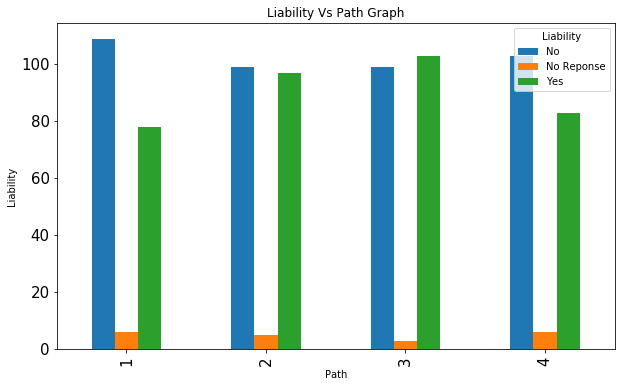

In [42]:
## Plot Juror Responce vs Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


pd.crosstab(newdf.Path,newdf.Liability).plot(kind='bar', fontsize = 15, figsize=(10,6))
plt.title('Liability Vs Path Graph')
plt.xlabel('Path')
plt.ylabel('Liability')
plt.savefig('Juror Response vs Path')

a = newdf['Path']
b = newdf['Liability']
pd.crosstab(a,b)

## Finding the Winrate, Expected Damages, mean , median and SD

In [43]:
## Finding winrate percentage for each path 
ratedf=pd.DataFrame(newdf[['Liability','Path','Was_McNeil_negligent']])
ratedf['winrate_percentage']=ratedf.Liability

In [44]:

ratedf['winrate_percentage']=newdf.Liability
ratedf['damages_mean']=pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14) + pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_58) 
ratedf['damages_median']=pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14 )+pd.to_numeric( newdf.Non_economic_damages_McNeil_suffered_58) 
ratedf['damages_sd']=pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14) + pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_58)
ratedf['winrate_percentage'] = ratedf['winrate_percentage'].map({"Yes":1, "No":0})

winrate_damages_expected=ratedf.groupby('Path').aggregate(
    {'winrate_percentage': np.mean
     ,'damages_mean': np.mean
     ,'damages_median':np.median
     ,'damages_sd':np.std
    })

winrate_damages_expected

,winrate_percentage,damages_mean,damages_median,damages_sd
Path,,,,
1,0.417112,100735.699482,0.0,181063.194368
2,0.494898,111415.422886,0.0,175733.229103
3,0.509901,105321.951220,0.0,169067.435658
4,0.446237,112500.026042,0.0,189577.911915


## Finding the Damages, mean , median and SD when plaintiff wins.

In [45]:

winrate_damages_plaintiffwin = ratedf.loc[(ratedf['Was_McNeil_negligent']== 1) & (ratedf['Liability']=='Yes')].groupby('Path').aggregate(
    {'damages_mean': np.mean
     ,'damages_median':np.median
     ,'damages_sd':np.std
    })
winrate_damages_plaintiffwin

,damages_mean,damages_median,damages_sd
Path,,,
1,263374.687500,250000.0,187269.191927
2,217755.102041,150000.0,187308.405512
3,200714.285714,150000.0,166498.873870
4,243750.156250,250000.0,169781.411890


## Answering to the question.



<font color = red>
With respect to the first question, I realize that answers from participants in versions 1 and 5 are meaningless.  They did not see evidence of added core inserts. As far as the analysis, I think we want to see if this answer predicted how people responded to the liability questions. For example, did people that said "Yes this evidence strongly suggested the Carve 3000 was defective” find liability more often than people that answered “No”. 
</font>

Here Q40 is **"Did the fact that X5 added core inserts to the later Carve 3000 model, affect your view as to whether the original Carve 3000 was defective?"**

The Values are: 
- 1 = Yes, it strongly suggested that the original Carve 3000 was defective.
- 2 = Yes, it somewhat suggested that the original Carve 3000 was defective.
- 3 = No, it did not suggest that the original Carve 3000 was defective.

So first lets check the brief summary table for each scenarios.

In [46]:
a = newdf['Q40'].replace([1.0,2.0,3.0], ['Yes','Maybe','No'])
a = a[a.apply(len) > 0]
b = newdf['Liability']
#p = pd.crosstab([df.Path,b], a,  margins=True )

p = pd.crosstab([b,a], df.Path,  margins=True , margins_name='Total')
p

Path              1    2   3   4   5   6    7   8  Total
Liability Q40                                           
No        Maybe   3    5   3   3   6   1    7   3     31
          No     46   47  41  51  54  46   48  46    379
Yes       Maybe  19   23  25  15  17  16   24  20    159
          No     13    7  19  15   9   7   14  14     98
          Yes    11   19  11   9   9  25   10  10    104
Total            92  101  99  93  95  95  103  93    771

## Observation 

- Among 54 Juror who <font color = 'red'>Strongly</font> supported the  that the fact that the original Carve 3000 was defective, 50 said Yes for Liability. 

- Among 238 Juror who said No to question 40, 185 said No for Liability i:e <font color = red> No for "Was the Carve 3000  snowboard X5 sold Connor McNeil defective?" </font> and 54 Juror said 'Yes' for Liability. 

- **isin** returns the values in df['Path'] that are in the given list, and the ~ at the beginning is essentially a not operator.

#### Below is the plot for Path 2,3,4,6,7,8

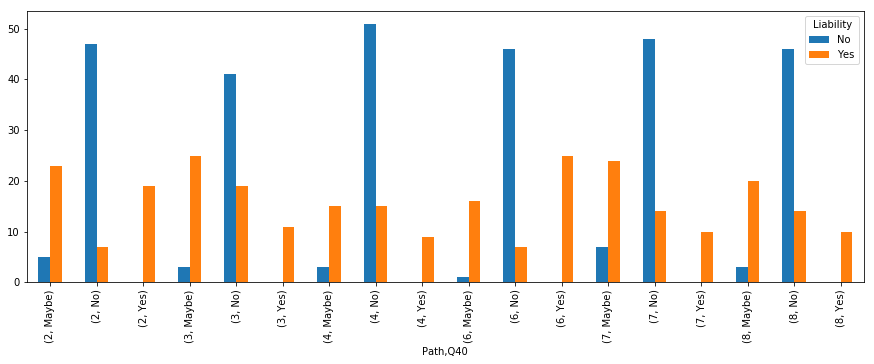

In [47]:
newdf15 = df[~df['Path'].isin([1,5])]
_ = pd.crosstab([newdf15.Path,a], b).plot(kind='bar', fontsize = 10, figsize=(15,5))

One more **comment in the 1st question**.  We also want to see if the jury instructions in 3,4 and 7,8 help participant resist the evidence.  

So we want to also compare if verdicts as a function of yes, no, maybe in <font color = red>2 and 5 are </font>different than those in 3,4,7 & 8.  If they do, we want to see if the different instructions matter.  That is verdicts as function of yes, no, maybe or different in 3 and 7 vs 4 and 8.

As per the above table.

<font color = red>Doubt : 2 and 5 or 2 vs 6</font>



In [48]:
## Percentage for each path 

p1 = p.T/p["Total"]*100
p1 = p1.T
p1
## Lets only check for 2 and 5
print("Printing Total count of liability for path 2 and 5 ")
print("---------------------------------------------------------- ")
print(p[[2,5]])

print("---------------------------------------------------------- ")
print("Printing the percentage from of liability for path 2 and 5 ")
print("---------------------------------------------------------- ")
print(p1[[2,5]])


## Lets only check for 3 and 7
print("---------------------------------------------------------- ")
print("Printing Total count of liability for path 3 and 7 ")
print("---------------------------------------------------------- ")
print(p[[3,7]])

print("---------------------------------------------------------- ")
print("Printing the percentage from of liability for path 3 and 7 ")
print("---------------------------------------------------------- ")
print(p1[[3,7]])


## Lets only check for 4 and 8
print("---------------------------------------------------------- ")
print("Printing Total count of liability for path 4 and 8 ")
print("---------------------------------------------------------- ")
print(p[[4,8]])

print("---------------------------------------------------------- ")
print("Printing the percentage from of liability for path 4 and 8 ")
print("---------------------------------------------------------- ")
print(p1[[4,8]])

Printing Total count of liability for path 2 and 5 
---------------------------------------------------------- 
Path               2   5
Liability Q40           
No        Maybe    5   6
          No      47  54
Yes       Maybe   23  17
          No       7   9
          Yes     19   9
Total            101  95
---------------------------------------------------------- 
Printing the percentage from of liability for path 2 and 5 
---------------------------------------------------------- 
Path                     2          5
Liability Q40                        
No        Maybe  16.129032  19.354839
          No     12.401055  14.248021
Yes       Maybe  14.465409  10.691824
          No      7.142857   9.183673
          Yes    18.269231   8.653846
Total            13.099870  12.321660
---------------------------------------------------------- 
Printing Total count of liability for path 3 and 7 
---------------------------------------------------------- 
Path              3    7
Liabili

Text(0.5,0,'Path 4 and 8, Q40')

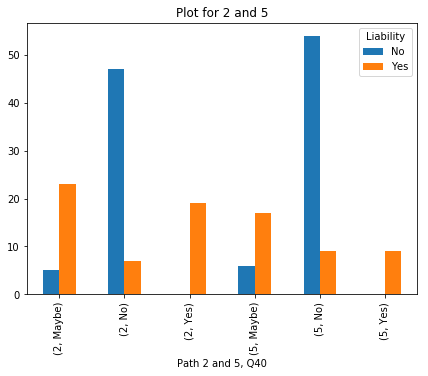

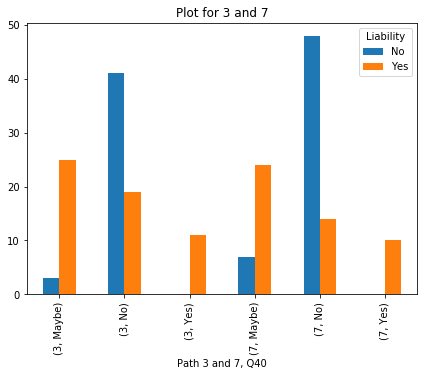

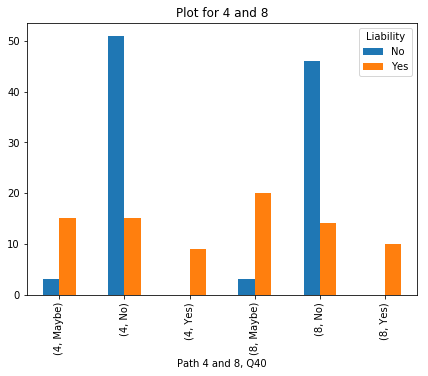

In [49]:
newdf25 = df[df['Path'].isin([2,5])]
_ = pd.crosstab([newdf25.Path,a], b).plot(kind='bar', fontsize = 10,title='Plot for 2 and 5', figsize=(7,5))
plt.xlabel('Path 2 and 5, Q40')

newdf37 = df[df['Path'].isin([3,7])]
_ = pd.crosstab([newdf37.Path,a], b).plot(kind='bar', fontsize = 10,title='Plot for 3 and 7', figsize=(7,5))
plt.xlabel('Path 3 and 7, Q40')


newdf48 = df[df['Path'].isin([4,8])]
_ = pd.crosstab([newdf48.Path,a], b).plot(kind='bar', fontsize = 10,title='Plot for 4 and 8',  figsize=(7,5))
plt.xlabel('Path 4 and 8, Q40')

## Question 2:

With respect to the 2nd questions, again answers from participants in versions 1,2 and 5 and 6  are meaningless. They did not receive the jury instruction telling them to ignore the evidence.  Again, we should do the same analysis as above. Do people that say they can ignore the evidence have lower liability verdicts than people that say they cannot ignore the evidence (for the remaining scenarios 3-4 and 7-8).

.

**<font color = red>Q41: 'Were you able to ignore the  fact that X5 added core inserts to the later Carve 3000 model when deciding whether the original Carve 3000 was defective?'</font>**

- Yes, I was able to ignore that evidence  (1) 
- Not Sure  (2) 
- No, I was not able to ignore that evidence  (3) 

### Plot for Path 1, 2 , 5 and 7

<font color = red> Latest response: 2.  It appears this time you discarded the correct data (1,2, 5, and 6).  In addition to the information you provided, we want to compare verdict rates for people that yes vs. no vs. maybe</font>

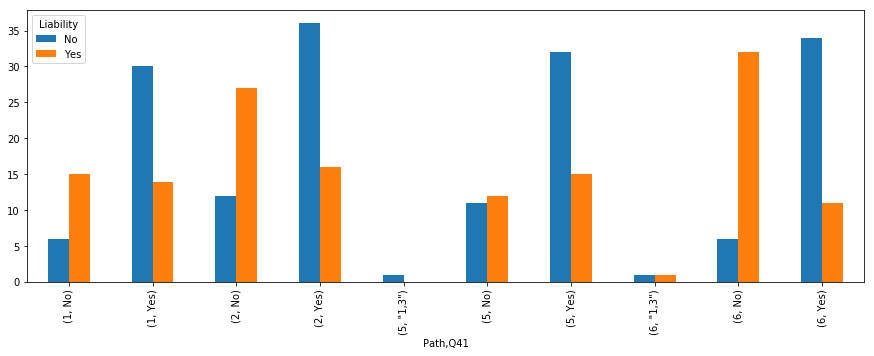

In [60]:
a1 = newdf['Q41'].replace(['1','2','3'], ['Yes','NotSure','No'])
a1= a1[a1.apply(len) > 0]

newdf3478 = df[df.Path.isin([1,2,5,6])]
_ = pd.crosstab([newdf3478.Path,a1], b).plot(kind='bar', fontsize = 10, figsize=(15,5))  

## Observation

We have found some invalid data in the Column ("1,3")

**To do**-

**<font color = red>Need to check what should be the appropriate interpretaion of this value.</font>**

In [51]:
 newdf['Q41'].unique()

array(['', '3', '1', '"1,3"'], dtype=object)

In [52]:
newdf.columns
newdf1=pd.DataFrame(newdf[["StartDate","EndDate","Duration","Liability",'Total_Damages','Path','Was_McNeil_negligent']])

In [53]:
newdf1.rename(columns={"StartDate": "Start Date", 
                         "EndDate":"End Date",
                         "Total_Damages":"damages",
                       "Was_McNeil_negligent":"Plaintiff_negligent"
                         },inplace=True)

newdf1['Plaintiff_negligent'] = newdf1['Plaintiff_negligent'].map({1:"Yes", 2:"No"})
newdf1['Liability'] = newdf1['Liability'].map({"Yes":1, "No":0})

In [54]:
req_data.columns
req_data1=pd.DataFrame(req_data[["Start Date","End Date","Liability",'damages','Scenario','perc_calc','mm_perc','Dunn_negligent']])
req_data1.rename(columns={
                       "Scenario":"Path","Dunn_negligent":"Plaintiff_negligent"
                         },inplace=True)

In [55]:
frames=[newdf1,req_data1]
merge_data = pd.concat(frames, keys=['x', 'y'])

merge_data.head()

Duration            End Date  Liability  Path Plaintiff_negligent  \
x 2       60.0 2018-04-06 13:18:00        NaN     2                 NaN   
  4      255.0 2018-04-06 13:19:00        NaN     3                 NaN   
  8      259.0 2018-04-06 13:21:00        1.0     3                 Yes   
  9      192.0 2018-04-06 13:21:00        1.0     2                 Yes   
  11     342.0 2018-04-06 13:25:00        0.0     2                 NaN   

              Start Date   damages mm_perc  perc_calc  
x 2  2018-04-06 13:17:00       0.0     NaN        NaN  
  4  2018-04-06 13:14:00       0.0     NaN        NaN  
  8  2018-04-06 13:17:00  200000.0     NaN        NaN  
  9  2018-04-06 13:18:00   35000.0     NaN        NaN  
  11 2018-04-06 13:19:00       0.0     NaN        NaN

Case Expected Value Damages for the merge data
Showing the total expected damages mean,median and sd with winrate percentage (entire version)



In [56]:
merge_data
merge_data['winrate_percentage']=merge_data.Liability
merge_data['damages_mean']=merge_data.damages+merge_data.perc_calc
merge_data['damages_median']=merge_data.damages
merge_data['damages_sd']=merge_data.damages



winrate_damages_expected=merge_data.groupby('Path').aggregate(
    {'winrate_percentage': np.mean, 'damages_mean': np.mean,'damages_median':np.median,'damages_sd':np.std})


winrate_damages_expected.winrate_percentage*=100
winrate_damages_expected



,winrate_percentage,damages_mean,damages_median,damages_sd
Path,,,,
1,44.587629,86726.368159,0.0,148813.041277
2,49.109415,89847.715736,0.0,145988.244885
3,59.536082,125663.978495,80000.0,149275.771909
4,52.820513,111214.852941,0.0,154554.479928
5,57.591623,96426.701571,90000.0,100404.383527


In [57]:
#To retrive data based on the keys:
merge_data.loc['y']

,Duration,End Date,Liability,Path,Plaintiff_negligent,Start Date,damages,mm_perc,perc_calc,winrate_percentage,damages_mean,damages_median,damages_sd
0,NaN,2017-09-29 14:16:00,0.0,1,NaN,2017-09-29 13:58:00,0.0,1,0.0,0.0,0.0,0.0,0.0
1,NaN,2017-09-29 14:18:00,0.0,1,NaN,2017-09-29 14:00:00,0.0,1,0.0,0.0,0.0,0.0,0.0
2,NaN,2017-09-29 14:19:00,0.0,1,NaN,2017-09-29 13:57:00,0.0,1,0.0,0.0,0.0,0.0,0.0
3,NaN,2017-09-29 14:21:00,0.0,1,NaN,2017-09-29 14:01:00,0.0,1,0.0,0.0,0.0,0.0,0.0
4,NaN,2017-09-29 14:23:00,0.0,1,NaN,2017-09-29 14:04:00,0.0,1,0.0,0.0,0.0,0.0,0.0
5,NaN,2017-09-29 14:25:00,0.0,1,NaN,2017-09-29 14:06:00,0.0,1,0.0,0.0,0.0,0.0,0.0
6,NaN,2017-09-29 14:26:00,0.0,1,NaN,2017-09-29 14:06:00,0.0,1,0.0,0.0,0.0,0.0,0.0
7,NaN,2017-09-29 14:35:00,0.0,1,NaN,2017-09-29 14:16:00,0.0,1,0.0,0.0,0.0,0.0,0.0
8,NaN,2017-09-29 14:49:00,0.0,1,NaN,2017-09-29 14:27:00,0.0,1,0.0,0.0,0.0,0.0,0.0
9,NaN,2017-09-29 15:02:00,0.0,1,NaN,2017-09-29 14:44:00,0.0,1,0.0,0.0,0.0,0.0,0.0


## Finding the Damages, mean , median and SD when plaintiff wins for the merge data

In [58]:
#req_data['winrate_percentage']=np.mean(req_data.Juror_Response)
#print(req_data)
merge_data['mm_perc'].fillna(1,inplace=True)
merge_data['damages_mean1']=merge_data.damages*pd.to_numeric(merge_data.mm_perc)
merge_data['damages_median1']=merge_data.damages
merge_data['damages_sd1']=merge_data.damages
#print(req_data.mm_perc)

winrate_damages_plaintiffwin=merge_data.loc[(merge_data['Plaintiff_negligent']=='No') & (merge_data['Liability']==1)].groupby('Path').aggregate({'damages_mean1': np.mean,'damages_median1':np.median,'damages_sd1':np.std})


winrate_damages_plaintiffwin



,damages_mean1,damages_median1,damages_sd1
Path,,,
1,233729.729730,200000.0,141989.816917
2,218856.557377,180000.0,128836.296274
3,228284.768212,200000.0,129885.250766
4,238085.034014,200000.0,143249.523346
5,173118.279570,150000.0,78781.184228


In [59]:
import pandas as pd
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(merge_data.Path, merge_data.Liability),correction=False)

(21.16799502460218,
 0.0002932828983428096,
 4,
 array([[185.57485714, 202.42514286],
        [187.96628571, 205.03371429],
        [185.57485714, 202.42514286],
        [186.53142857, 203.46857143],
        [ 91.35257143,  99.64742857]]))